In [11]:
from google.colab import drive
drive.mount('/content/drive')  # /content/drive/My Drive/DataSet_cats_dogs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Required libraries

In [16]:
import os
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## **Create and organize folders - extract data - understand data - copy data**

In [18]:
base_dir = '/content/drive/My Drive/cats-and-dogs-small'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

os.makedirs('/content/drive/My Drive/cats-and-dogs-small/my_dataset', exist_ok=True)

**File extraction**

In [19]:
# Extract the files from the original zip
with zipfile.ZipFile('/content/drive/My Drive/dogs-vs-cats.zip', "r") as zip_ref:
    zip_ref.extractall(base_dir)
# Transfer images to my-dataset folder
with zipfile.ZipFile("/content/drive/My Drive/cats-and-dogs-small/train.zip", "r") as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/cats-and-dogs-small/my_dataset')

**Understanding and visualization of data**

Total Images in Data Set: 25000
Qty Image Dogs: 12500
Qty Image Cats: 12500


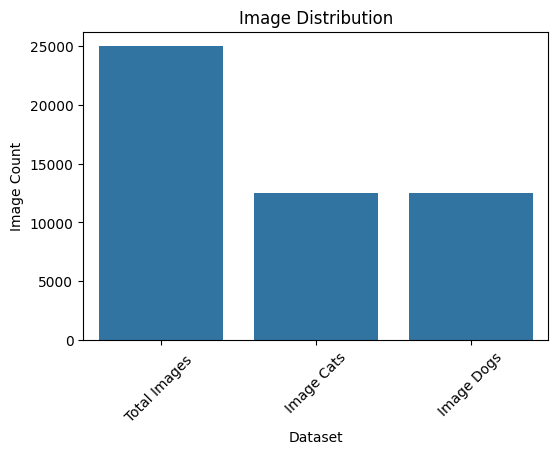

In [20]:
dataset_path = '/content/drive/My Drive/cats-and-dogs-small/my_dataset/train'
print("Total Images in Data Set:", len(os.listdir(dataset_path)))

cat_count = 0
dog_count = 0
# Scan all files in the folder
for filename in os.listdir(dataset_path):
   if filename.endswith(".jpg"):
       category = filename.split(".")[0]
       if category == "cat":
            cat_count += 1
       elif category == "dog":
            dog_count += 1
print(f"Qty Image Dogs: {dog_count}")
print(f"Qty Image Cats: {cat_count}")

data = {
    "Dataset": ["Total Images ", "Image Cats", "Image Dogs"],
    "Image Count": [len(os.listdir(dataset_path)), dog_count, cat_count]
}
df = pd.DataFrame(data)

plt.figure(figsize=(6, 4))
sns.barplot(x="Dataset", y="Image Count", data=df)
plt.title("Image Distribution")
plt.xlabel("Dataset")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()

**Create and organize folders**

In [21]:
train_dir = '/content/drive/My Drive/cats-and-dogs-small/data_train'
os.makedirs(train_dir, exist_ok=True)
train_cats_dir = '/content/drive/My Drive/cats-and-dogs-small/data_train/cats'
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = '/content/drive/My Drive/cats-and-dogs-small/data_train/dogs'
os.makedirs(train_dogs_dir, exist_ok=True)

validation_dir = '/content/drive/My Drive/cats-and-dogs-small/data_validation'
os.makedirs(validation_dir, exist_ok=True)
validation_cats_dir = '/content/drive/My Drive/cats-and-dogs-small/data_validation/cats'
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = '/content/drive/My Drive/cats-and-dogs-small/data_validation/dogs'
os.makedirs(validation_dogs_dir, exist_ok=True)

test_dir = '/content/drive/My Drive/cats-and-dogs-small/data_test'
os.makedirs(test_dir, exist_ok=True)
test_cats_dir ='/content/drive/My Drive/cats-and-dogs-small/data_test/cats'
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = '/content/drive/My Drive/cats-and-dogs-small/data_test/dogs'
os.makedirs(test_dogs_dir, exist_ok=True)

In [22]:
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames_cat:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(train_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames_dog:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(train_dir, fname)
  shutil.copyfile(src, dst)
print("Total Images Data Train:", len(os.listdir(train_dir)))
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
fnames_dog = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames_cat:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames_dog:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
print("Total Images Data Validation:", len(os.listdir(validation_dir)))
fnames_cat = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
fnames_dog = ['dog.{}.jpg'.format(j) for j in range(1500,2000)]
for fname in fnames_cat:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames_dog:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)
print("Total Images Data Test:", len(os.listdir(test_dir)))

Total Images Data Train: 2002
Total Images Data Validation: 1002
Total Images Data Test: 1002


**Copy images to folders**

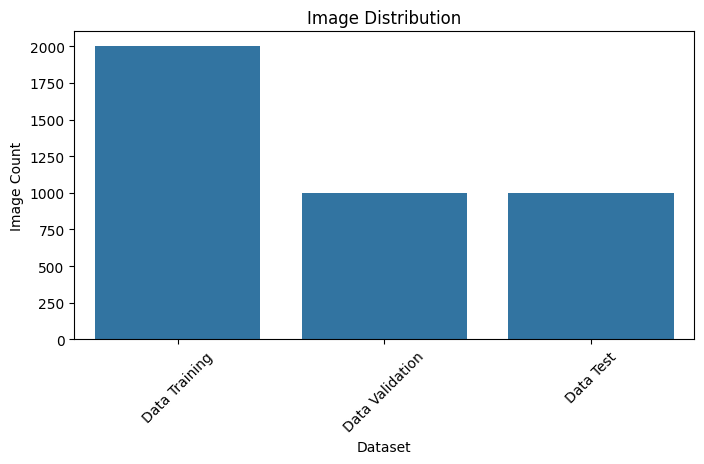

In [23]:
data = {
    "Dataset": ["Data Training","Data Validation","Data Test"],
    "Image Count": [len(os.listdir(train_dir)), len(os.listdir(validation_dir)) ,len(os.listdir(test_dir))]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 4))
sns.barplot(x="Dataset", y="Image Count", data=df )

plt.title("Image Distribution")
plt.xlabel("Dataset")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()

In [24]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

  fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(dataset_path, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

**Ensuring that images are copied**

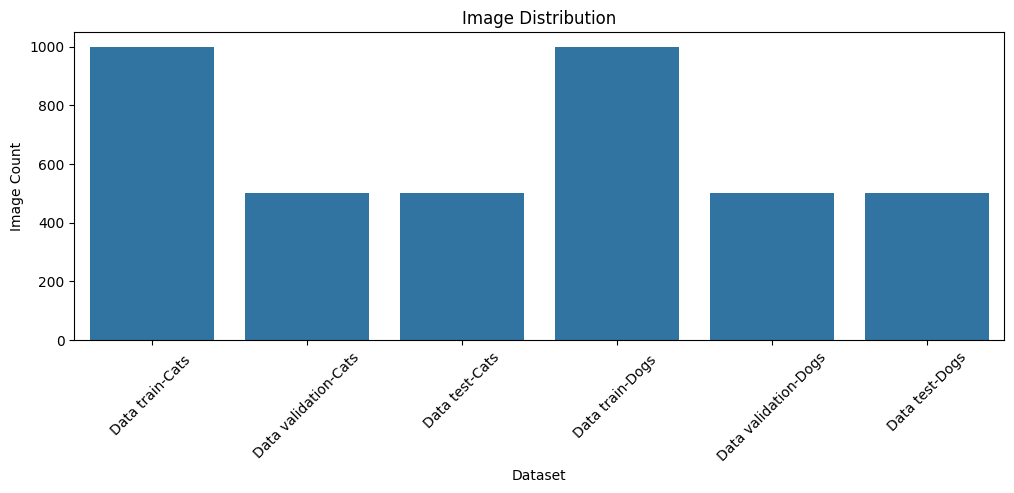

In [25]:
data1 = {
    "Dataset": ["Data train-Cats ", "Data validation-Cats", "Data test-Cats",
                "Data train-Dogs ", "Data validation-Dogs", "Data test-Dogs"],
    "Image Count": [len(os.listdir(train_cats_dir)), len(os.listdir(validation_cats_dir)), len(os.listdir(test_cats_dir)),
                    len(os.listdir(train_dogs_dir)),len(os.listdir(validation_dogs_dir)), len(os.listdir(test_dogs_dir))]
}
dff = pd.DataFrame(data1)

plt.figure(figsize=(12, 4))
sns.barplot(x="Dataset", y="Image Count", data=dff )

plt.title("Image Distribution")
plt.xlabel("Dataset")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()


In [31]:
print("Total Images Cats in folder data-train/cats:", len(os.listdir(train_cats_dir)))
print("Total Images Cats in folder data-validation/cats:", len(os.listdir(validation_cats_dir)))
print("Total Images Cats in folder data-test/cats::", len(os.listdir(test_cats_dir)))
print("Total Images Cats in folder data-train/dogs:", len(os.listdir(train_dogs_dir)))
print("Total Images Cats in folder data-validation/dogs:", len(os.listdir(validation_dogs_dir)))
print("Total Images Cats in folder data-test/dogs::", len(os.listdir(test_dogs_dir)))

Total Images Cats in folder data-train/cats: 1000
Total Images Cats in folder data-validation/cats: 500
Total Images Cats in folder data-test/cats:: 500
Total Images Cats in folder data-train/dogs: 1000
Total Images Cats in folder data-validation/dogs: 500
Total Images Cats in folder data-test/dogs:: 500


# **Model construction - Model configuration - Data Preprocessing - Model fit - Model evaluation**

***Model construction***

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

***Model configuration for training***

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

***Using ImageDataGenerator to read images from directories***

In [ ]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Fitting the model using a batch generator**

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30


<ipython-input-70-f61a1535c537>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 19s 132ms/step - loss: 0.6941 - acc: 0.5275 - val_loss: 0.6729 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6924 - acc: 0.5730 - val_loss: 0.6350 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6344 - acc: 0.6170 - val_loss: 0.6275 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6042 - acc: 0.6775 - val_loss: 0.5863 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5529 - acc: 0.7200 - val_loss: 0.5757 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 15s 145ms/step - loss: 0.5088 - acc: 0.7455 - val_loss: 0.5660 - val_acc: 0.7220
Epoch 7/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4789 - acc: 0.7690 - val_loss: 0.5332 - val_acc: 0.7270
Epoch 8/30
100/100 [==============================] - 13s 134ms/st

**Displaying curves of loss and accuracy during training**

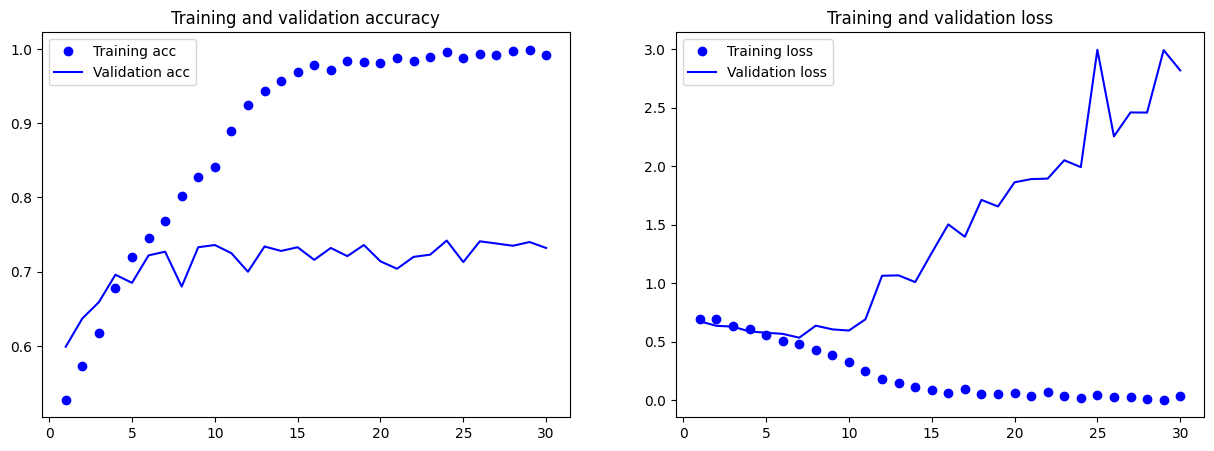

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

*Both characteristic graphs are **over-fitting**.*
Accuracy in train data increases linearly, but in validation data, it remains around 70-72%
## Using **Regularization** techniques along with **Data Augmentation** to eliminate *overfitting*

Using **Data Augmentation** with the ***ImageDataGenerator*** class in the Cross library

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

**Show multiple images produced with Data Augmentation**

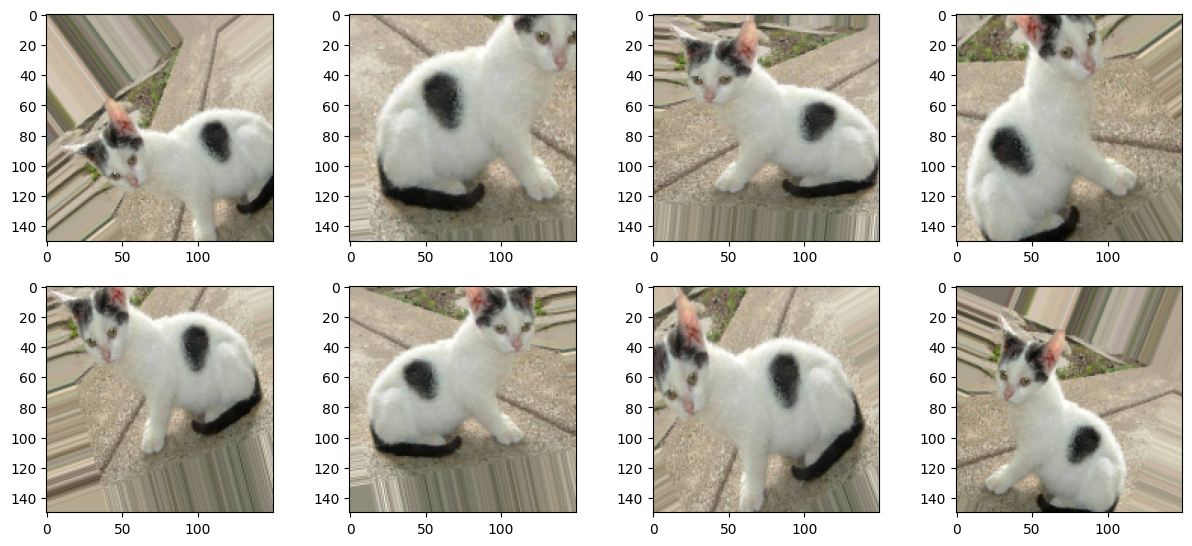

In [ ]:
num_images = 8

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

i = 0
plt.figure(figsize=(15, 10))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 4, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i >= num_images:
        break
plt.show()


**Defining a new convnet that includes dropout**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Compile the model**

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

**Model is trained using *Data Agmentation* and Drop Out**

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-92-b3626e652f7f>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  new_history = model.fit_generator(train_generator,


Epoch 1/30
63/63 [==============================] - 25s 391ms/step - loss: 0.6696 - acc: 0.5860 - val_loss: 0.6385 - val_acc: 0.6540
Epoch 2/30
63/63 [==============================] - 24s 388ms/step - loss: 0.6539 - acc: 0.6075 - val_loss: 0.7923 - val_acc: 0.5510
Epoch 3/30
63/63 [==============================] - 26s 420ms/step - loss: 0.6467 - acc: 0.6120 - val_loss: 0.6233 - val_acc: 0.6350
Epoch 4/30
63/63 [==============================] - 27s 428ms/step - loss: 0.6350 - acc: 0.6395 - val_loss: 0.5864 - val_acc: 0.6900
Epoch 5/30
63/63 [==============================] - 24s 384ms/step - loss: 0.6209 - acc: 0.6495 - val_loss: 0.6000 - val_acc: 0.6640
Epoch 6/30
63/63 [==============================] - 26s 407ms/step - loss: 0.6180 - acc: 0.6775 - val_loss: 1.2050 - val_acc: 0.5410
Epoch 7/30
63/63 [==============================] - 24s 382ms/step - loss: 0.5981 - acc: 0.6865 - val_loss: 0.5728 - val_acc: 0.6850
Epoch 8/30
63/63 [==============================] - 24s 381ms/step - 

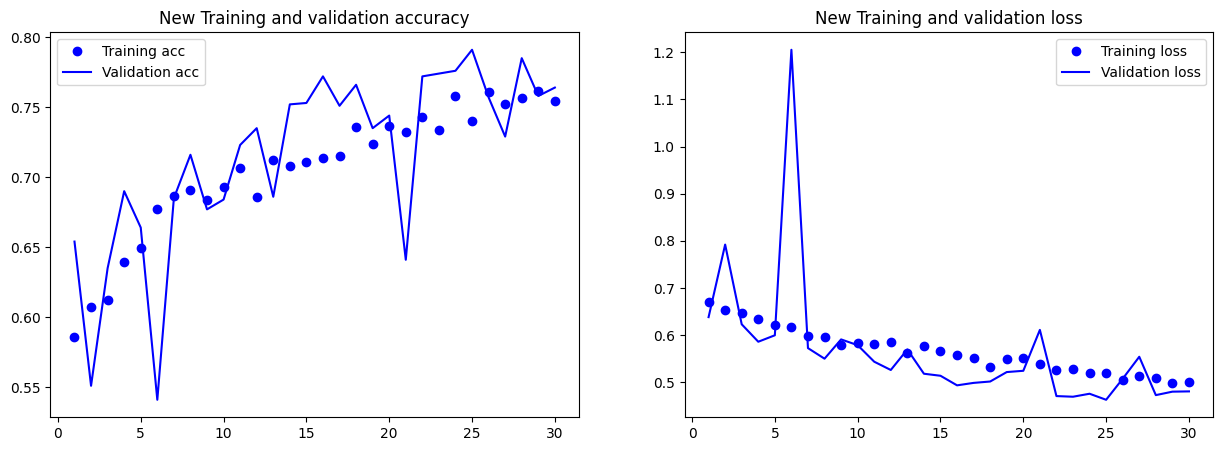

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')



new_history = model.fit_generator(train_generator,
                                  epochs=30,
                                  steps_per_epoch=len(train_generator),
                                  validation_data=validation_generator,
                                  validation_steps=len(validation_generator))

new_acc = new_history.history['acc']
new_val_acc = new_history.history['val_acc']
new_loss = new_history.history['loss']
new_val_loss = new_history.history['val_loss']
new_epochs = range(1, len(new_acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(new_epochs, new_acc, 'bo', label='Training acc')
ax1.plot(new_epochs, new_val_acc, 'b', label='Validation acc')
ax1.set_title('New Training and validation accuracy')
ax1.legend()

ax2.plot(new_epochs, new_loss, 'bo', label='Training loss')
ax2.plot(new_epochs, new_val_loss, 'b', label='Validation loss')
ax2.set_title('New Training and validation loss')
ax2.legend()

plt.show()


The model is no overfitting and the accuracy is improved to 77%

## USING A PRETRAINED CONVNET (**TRANSFER LEARNING** WITH CNN)
Two approaches are possible for using a pre-trained model:
### Approach 1: **Feature Extraction**
1.   Feature Extraction without Data Augmentation
*   Running Convolutional Basis on the dataset, saving its output as an array Numpy, and using this array as input to a dense connected classifier.
2.   Feature Extraction with Data Augmentation
*   Extending the existing model by adding dense layers on top of it and running the entire model end-to-end on the input data
  
 ---

### Approach 2: **Fine-Tuning**

Taking some of the upper layers of the model out of freezing mode and training it together with the layers added to the model




## **Instantiating the VGG16 convolutional base**

In [26]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### **1-1** **Extracting features using the pretrained convolutional base**

In [33]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:  break
  return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
# Flatten fatures
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step


**Defining and training the densely connected classifier**

In [34]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 20ms/step - loss: 0.7608 - acc: 0.7515 - val_loss: 0.8089 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3573 - acc: 0.8540 - val_loss: 0.2731 - val_acc: 0.8880
Epoch 3/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2797 - acc: 0.8885 - val_loss: 0.2923 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 2s 20ms/step - loss: 0.2578 - acc: 0.8985 - val_loss: 0.3100 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2343 - acc: 0.9055 - val_loss: 0.2332 - val_acc: 0.9080
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 0.1887 - acc: 0.9210 - val_loss: 0.3630 - val_acc: 0.8710
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1742 - acc: 0.9350 - val_loss: 0.2932 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 2s 18ms/step - 

**Plotting the results**

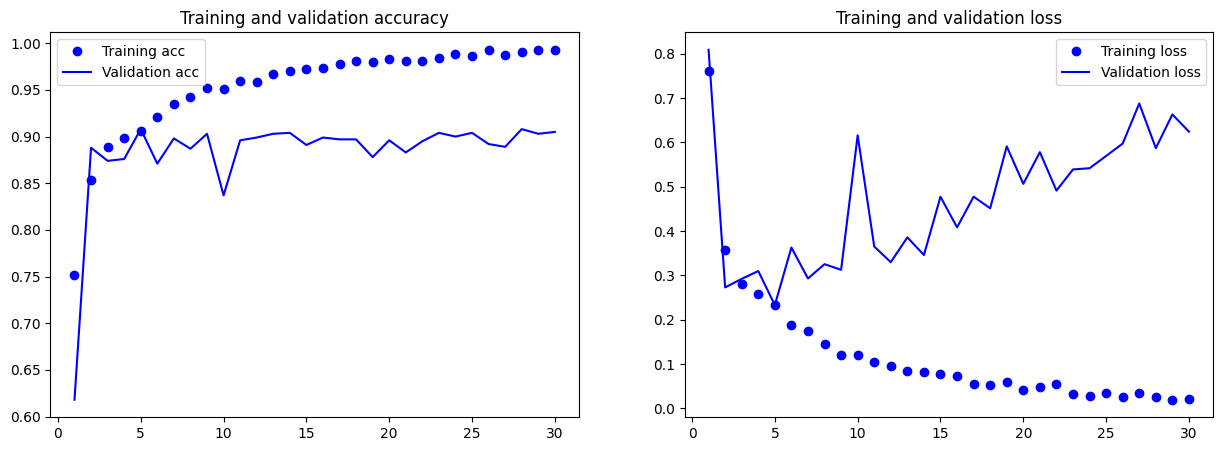

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()
#plt.figure()
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()
plt.show()

The accuracy reaches about 90% on the validation data, which was much better than that of the small model trained from scratch.![50.png](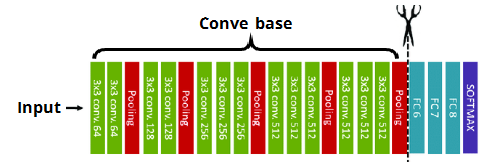![50.png](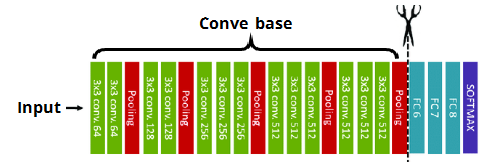![1656145387901.jpg](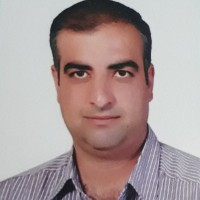![50.png](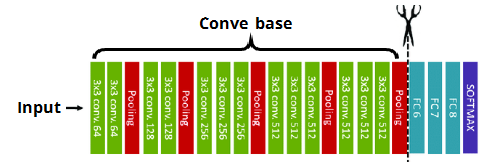![50.png](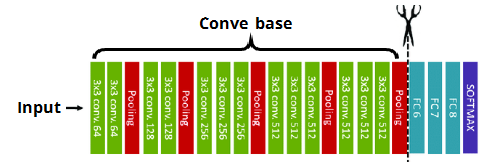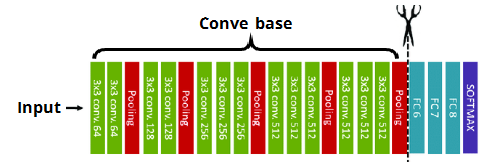)))))

###  **1-2**   **Adding a densely connected classifier on top of the convolutional base**

In [65]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


**Before compil and training, their base must be frozen**

In [67]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


**Training the model end to end with a frozen convolutional base**

In [68]:
train_datagen1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen1 = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen1.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator1 = test_datagen1.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator1,steps_per_epoch=100,epochs=30,validation_data=validation_generator1,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-68-e43ab32e81c3>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator1,steps_per_epoch=100,epochs=30,validation_data=validation_generator1,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 28s 274ms/step - loss: 0.7811 - acc: 0.6940 - val_loss: 0.3231 - val_acc: 0.8550
Epoch 2/30
100/100 [==============================] - 27s 273ms/step - loss: 0.4445 - acc: 0.7945 - val_loss: 0.3175 - val_acc: 0.8570
Epoch 3/30
100/100 [==============================] - 28s 277ms/step - loss: 0.4043 - acc: 0.8170 - val_loss: 0.3233 - val_acc: 0.8520
Epoch 4/30
100/100 [==============================] - 28s 277ms/step - loss: 0.3903 - acc: 0.8295 - val_loss: 0.2686 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 34s 344ms/step - loss: 0.3621 - acc: 0.8375 - val_loss: 0.2850 - val_acc: 0.8720
Epoch 6/30
100/100 [==============================] - 28s 278ms/step - loss: 0.3608 - acc: 0.8420 - val_loss: 0.2538 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3496 - acc: 0.8310 - val_loss: 0.2772 - val_acc: 0.8820
Epoch 8/30
100/100 [==============================] - 2

**Plotting the results**

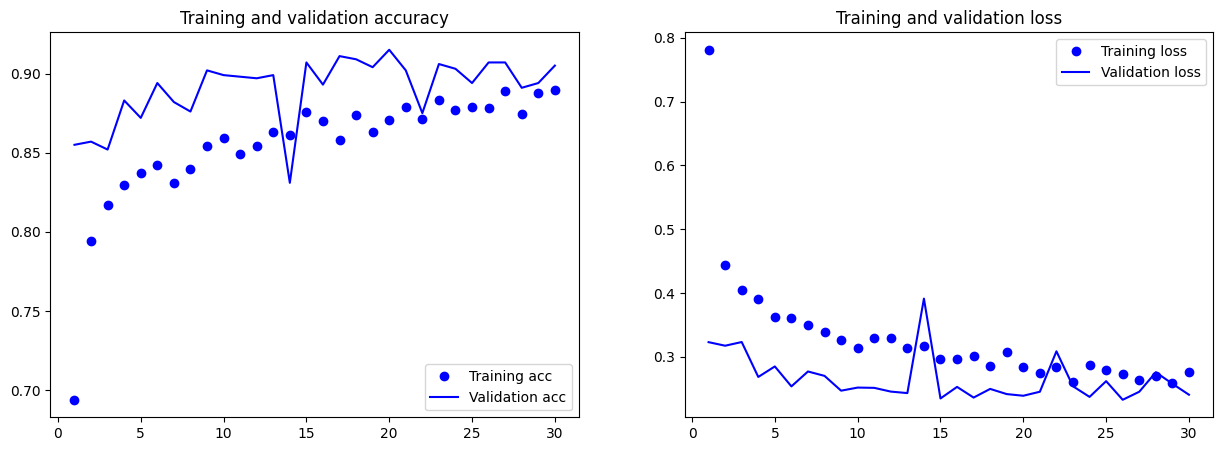

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()
#plt.figure()
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()
plt.show()

In the feature extraction method and the use of data augmentation, we reached 95% in the evaluation data

##**2-**Using the **Fine Tuning** method

**Summary of conv_base**



In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**We adjust only the top 2 to 3 layers of their cones**

In [72]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


####**Fine-tuning the model**

In [73]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-73-286c38543618>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 31s 290ms/step - loss: 25.0888 - acc: 0.5510 - val_loss: 0.6846 - val_acc: 0.5800
Epoch 2/100
100/100 [==============================] - 33s 328ms/step - loss: 1.0408 - acc: 0.5510 - val_loss: 0.6843 - val_acc: 0.5400
Epoch 3/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6761 - acc: 0.6860 - val_loss: 0.2624 - val_acc: 0.8880
Epoch 4/100
100/100 [==============================] - 27s 268ms/step - loss: 0.4276 - acc: 0.7985 - val_loss: 0.2308 - val_acc: 0.9160
Epoch 5/100
100/100 [==============================] - 28s 278ms/step - loss: 0.4295 - acc: 0.8475 - val_loss: 0.9772 - val_acc: 0.7160
Epoch 6/100
100/100 [==============================] - 26s 262ms/step - loss: 0.3173 - acc: 0.8720 - val_loss: 0.2079 - val_acc: 0.9250
Epoch 7/100
100/100 [==============================] - 35s 353ms/step - loss: 0.3297 - acc: 0.8770 - val_loss: 0.3499 - val_acc: 0.8700
Epoch 8/100
100/100 [==========================

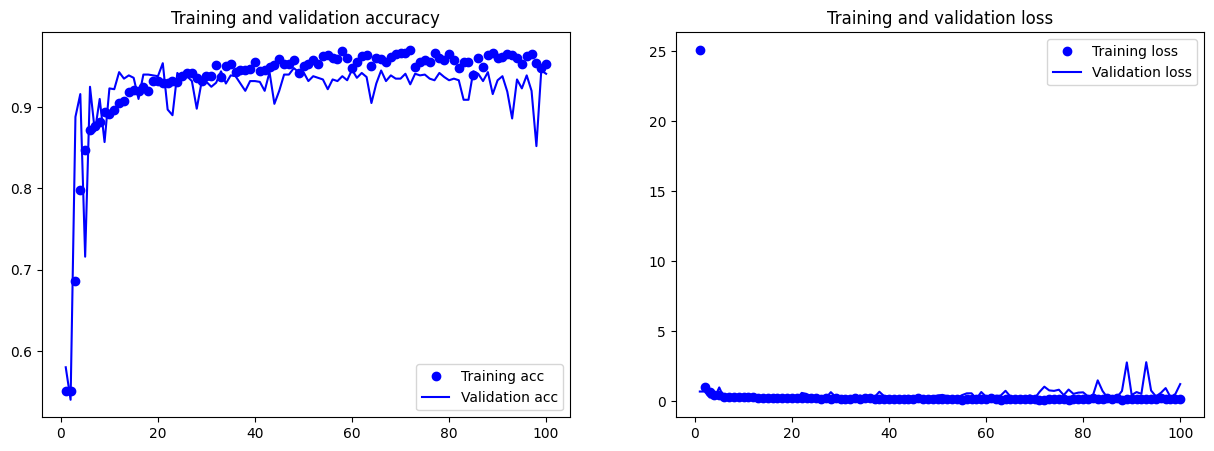

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs, acc, 'bo', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()
#plt.figure()
ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()
plt.show()

Considering that the curves are very noisy, we smooth them to make them more readable

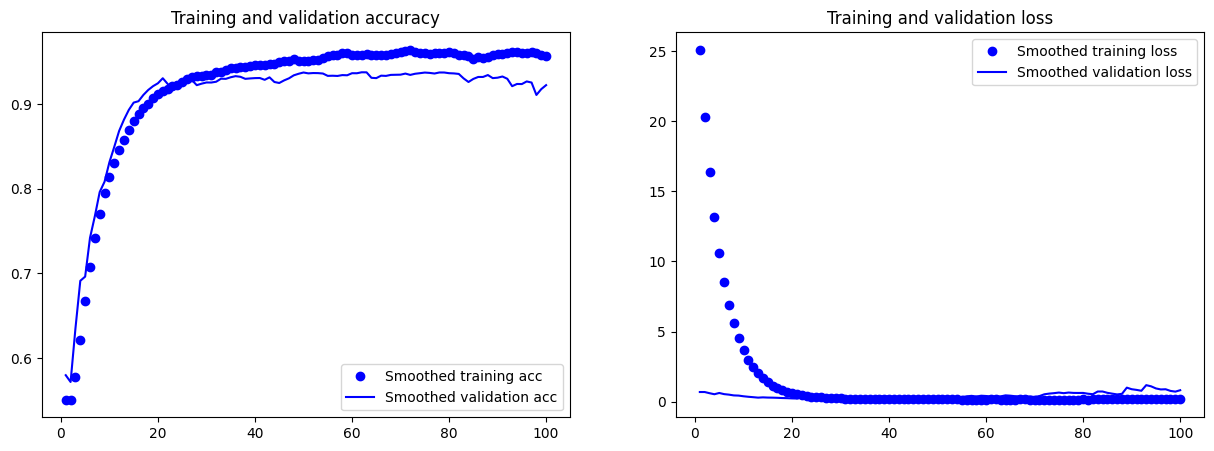

In [77]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
ax1.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()
ax2.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
ax2.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()
plt.show()

In this case, the highest accuracy of the model performance is about 97%.

**Model evaluation with training data**
Accuracy on ***test data***

In [78]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-78-e132b43aa580>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9380000233650208


### **end of the this project**